#### Change of OS DIR

In [1]:
import os
from collections import Counter

os.chdir('..')

In [2]:
os.getcwd()

'/mnt/c/Users/gvs/ubuntu/neural-review-summarization'

#### Loading of Train Data

In [3]:
from processors.imdb_processor import IMDBProcessor

In [12]:
processor = IMDBProcessor('data/labeledTrainData.tsv')

In [5]:
data_df = processor.load_data()

In [6]:
processor.prepare_data()

  0%|          | 0/25000 [00:00<?, ?it/s]

Generating n_grams


 42%|████▏     | 10537/25000 [02:55<04:01, 60.00it/s]

KeyboardInterrupt: 

Most common / least common n_grams:

In [7]:
processor.print_most_common(processor.bigrams, most_common=100)

[('special effects', 1068), ('i dont', 1049), ('new york', 713), ('first time', 684), ('low budget', 586), ('good movie', 568), ('same time', 562), ('high school', 511), ('main character', 504), ('only thing', 490), ('real life', 482), ('main characters', 421), ('many people', 416), ('long time', 408), ('great movie', 383), ('whole movie', 372), ('bad movie', 372), ('many times', 352), ('whole thing', 346), ('good job', 333), ('good film', 325), ('bad guys', 318), ('i guess', 302), ('other hand', 299), ('great film', 297), ('good thing', 294), ('only reason', 289), ('little bit', 286), ('first movie', 284), ('first film', 276), ('other films', 269), ('few years', 265), ('i didnt', 260), ('bad guy', 249), ('entire movie', 241), ('other movies', 238), ('martial arts', 237), ('great job', 225), ('young woman', 223), ('first place', 218), ('true story', 215), ('young man', 213), ('serial killer', 213), ('entire film', 207), ('many years', 206), ('big screen', 202), ('old man', 202), ('whol

In [8]:
processor.print_lest_common(processor.bigrams)

[('whole ordeal', 6), ('real interest', 6), ('clear story', 6), ('such depth', 6), ('beautiful work', 6), ('military base', 6), ('first show', 6), ('gopal varma', 6), ('individual scenes', 6), ('classic case', 6), ('classic lines', 6), ('nice gore', 6), ('nice bit', 6), ('little heart', 6), ('first woman', 6), ('main issue', 6), ('cinematic world', 6), ('cheap attempt', 6), ('n roll', 6), ('remarkable film', 6), ('basic concept', 6), ('overthetop performance', 6), ('sexy women', 6), ('whole place', 6), ('strong support', 6), ('grand island', 6), ('big bucks', 6), ('other students', 6), ('yellow submarine', 6), ('horrible thing', 6), ('great dialog', 6), ('ronny cox', 6), ('ridiculous movie', 6), ('sylvia kristel', 6), ('local community', 6), ('henry fool', 6), ('unbelievable situations', 6), ('snl skit', 6), ('fulllength feature', 6), ('original score', 6), ('hot shot', 6), ('lucky stars', 6), ('exotic cars', 6), ('outstanding movie', 6), ('romantic films', 6), ('asian girl', 6), ('att

##### Visualizing n_gram counts distributions

Total n_grams 1731


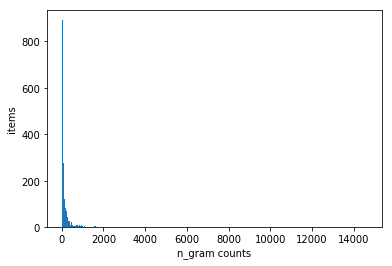

In [9]:
processor.visualize_n_grams_distribution(processor.unigrams)

Total n_grams 6244


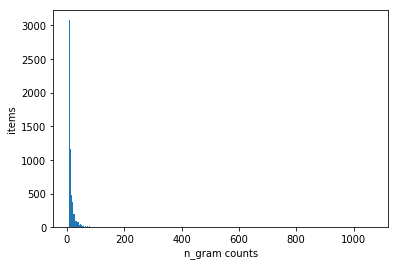

In [10]:
processor.visualize_n_grams_distribution(processor.bigrams)

Total n_grams 1700


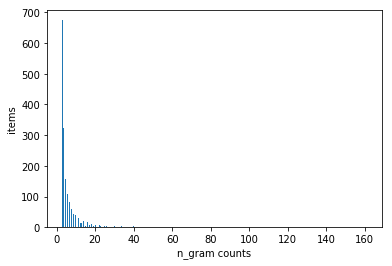

In [11]:
processor.visualize_n_grams_distribution(processor.trigrams)

Saving / loading of processor

In [12]:
processor.save_n_grams()

Saved n_gram files!


In [5]:
processor.load_n_grams()

(      Unnamed: 0                 Phrase  Count
 0              0            much makeup      6
 1              1         patrick wilson      6
 2              2         beautiful city      8
 3              3           strong woman      8
 4              4          good to watch     10
 5              5   wonderful experience      8
 6              6            main stream      7
 7              7            strange man     11
 8              8              good life     15
 9              9              wide shut     12
 10            10        first twothirds      7
 11            11            great music     56
 12            12                   cant    854
 13            13       very real danger      3
 14            14             new batman      8
 15            15        excellent music     11
 16            16             monumental     32
 17            17          famous actors     13
 18            18              impressed    186
 19            19                    odd

#### Testing models

In [4]:
from model.affinity_cluster_model import AffinityClusterModel
from collections import Counter

In [5]:
test_processor = IMDBProcessor('data/test.tsv')
test_data_df = test_processor.load_data(encoding='latin-1')
test_processor.prepare_data(test=True)

  0%|          | 0/42 [00:00<?, ?it/s]

Generating n_grams


100%|██████████| 42/42 [00:01<00:00, 25.39it/s]

Filtering n_grams
Done.


In [15]:
unigrams_cl = AffinityClusterModel()

539it [00:00, 5376.71it/s]

Loading GloVe model..


400000it [01:42, 3905.59it/s]

Done. 400000  words loaded!


In [16]:
unigrams_cl.load_model('unigrams')

100%|██████████| 188/188 [00:00<00:00, 4701.32it/s]


Loading scikit model..
Scikit model loaded.
Model loaded.


In [17]:
unigram_predictions, unigram_original_phrases, unigram_closest_phrases = unigrams_cl.predict(test_processor.unigrams)

100%|██████████| 618/618 [00:00<00:00, 4526.22it/s]


In [28]:
unigram_clusters_usage = Counter(unigram_predictions)
print(unigram_clusters_usage.most_common(30))
unigram_phrases_usage = unigrams_cl.get_clustered_predictions_and_counts(unigram_predictions, unigram_original_phrases)
print(unigram_phrases_usage)

[(151, 78), (119, 42), (143, 22), (110, 21), (84, 15), (175, 15), (21, 13), (116, 13), (20, 12), (103, 12), (113, 12), (154, 11), (98, 10), (123, 10), (87, 9), (184, 9), (14, 7), (45, 7), (72, 7), (126, 7), (128, 7), (30, 6), (118, 6), (180, 6), (0, 5), (29, 5), (44, 5), (47, 5), (61, 5), (108, 5)]
Counter({'bad': 49, 'good': 11, 'same': 10, 'futuristic': 10, 'ive': 9, 'hard': 8, 'much': 8, 'horrible': 7, 'only': 7, 'whoopi': 7, 'detective': 6, 'awful': 6, 'such': 6, 'funny': 6, 'stupid': 6, 'great': 6, 'dont': 5, 'sure': 5, 'new': 5, 'huge': 5, 'little': 5, 'dinosaur': 4, 'overall': 4, 'tough': 4, 'poor': 4, 'amazing': 4, 'painful': 4, 'weird': 4, 'other': 4, 'entire': 4, 'special': 4, 'many': 4, 'im': 4, 'rex': 4, 'violent': 4, 'few': 3, 'original': 3, 'young': 3, 'bottom': 3, 'super': 3, 'unfunny': 3, 'lame': 3, 'first': 3, 'clear': 3, 'due': 3, 'entertaining': 3, 'puerile': 3, 'buddy': 3, 'whole': 3, 'true': 3, 'ridiculous': 3, 'famous': 3, 'flat': 3, 'expensive': 3, 'nonstop': 2, 

In [20]:
unigram_phrases_usage = unigrams_cl.get_phrases_in_good_clusters(unigram_predictions, unigram_original_phrases)

print(unigram_phrases_usage)
print()
unigrams_cl.print_clustered_predictions(unigram_predictions, unigram_original_phrases)

({88: {'sick'}, 35: {'nostalgia', 'uplifting'}, 84: {'enjoyable', 'entertaining', 'gags', 'funny', 'unfunny'}, 1: {'watchable'}, 24: {'passable', 'unbearable'}, 76: {'proud', 'happy', 'glad'}}, {88: 1, 35: 2, 84: 59, 1: 4, 24: 5, 76: 6})

Printing the cluster with 59 mentions
enjoyable
entertaining
gags
funny
unfunny

Printing the cluster with 6 mentions
proud
happy
glad

Printing the cluster with 5 mentions
passable
unbearable

Printing the cluster with 4 mentions
watchable

Printing the cluster with 2 mentions
nostalgia
uplifting

Printing the cluster with 1 mentions
sick



In [22]:
bigrams_cl = AffinityClusterModel()


0it [00:00, ?it/s]
496it [00:00, 4873.62it/s]

Loading GloVe model..



965it [00:00, 4784.53it/s]
1468it [00:00, 4874.68it/s]
1969it [00:00, 4904.34it/s]
2423it [00:00, 4833.00it/s]
3036it [00:00, 5047.28it/s]
3499it [00:00, 4961.79it/s]
4009it [00:00, 4976.86it/s]
4483it [00:00, 4909.39it/s]
4976it [00:01, 4908.16it/s]
5527it [00:01, 4962.55it/s]
6082it [00:01, 5011.00it/s]
6627it [00:01, 5044.81it/s]
7175it [00:01, 5074.83it/s]
7705it [00:01, 5035.70it/s]
8214it [00:01, 4929.51it/s]
8693it [00:01, 4917.66it/s]
9164it [00:01, 4859.36it/s]
9613it [00:01, 4816.40it/s]
10098it [00:02, 4817.67it/s]
10549it [00:02, 4789.12it/s]
10991it [00:02, 4736.64it/s]Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/gvs/.virtualenvs/neural-review-summarization/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/gvs/.virtualenvs/neural-review-summarization/lib/python3.5/_weakrefset.py", l

Done. 400000  words loaded!


In [23]:
bigrams_cl.load_model('bigrams')

100%|██████████| 579/579 [00:00<00:00, 7403.97it/s]


Loading scikit model..
Scikit model loaded.
Model loaded.


In [24]:
bigram_predictions, bigram_original_phrases, bigram_closest_phrases = bigrams_cl.predict(test_processor.bigrams)

100%|██████████| 374/374 [00:00<00:00, 5770.22it/s]


In [27]:
bigram_clusters_usage = Counter(bigram_predictions)
print(bigram_clusters_usage.most_common(30))
bigram_phrases_usage = bigrams_cl.get_clustered_predictions_and_counts(bigram_predictions, bigram_original_phrases)
print(bigram_phrases_usage)

[(407, 15), (31, 11), (49, 8), (2, 5), (379, 5), (272, 5), (292, 5), (375, 5), (575, 5), (389, 5), (515, 4), (527, 4), (576, 4), (188, 4), (265, 4), (337, 4), (392, 4), (496, 4), (517, 3), (522, 3), (14, 3), (532, 3), (545, 3), (106, 3), (121, 3), (129, 3), (196, 3), (240, 3), (281, 3), (283, 3)]
Counter({'bad movie': 7, 'bad guys': 4, 'huge ripoff': 4, 'whoopi goldberg': 4, 'i dont': 4, 'special effects': 4, 'dinosaur detective': 3, 'bad films': 3, 'poor whoopi': 2, 'ridiculous i': 2, 'single worst': 2, 'massacred jokes': 2, 'futuristic cop': 2, 'awful lines': 2, 'nonstop straight': 2, 'lame cop': 2, 'good idea': 2, 'futuristic tale': 2, 'bad movies': 2, 'original movie': 2, 'acting character': 2, 'bad comedian': 2, 'anonymous rex': 2, 'bad impersonator': 2, 'bad buddy': 2, 'futuristic story': 2, 'horrible movie': 2, 'amazing technology': 2, 'puerile immature': 2, 'weird character': 2, 'mild violence': 2, 'mad scientist': 2, 'entire length': 2, 'famous people': 2, 'dont work': 2, 'few

In [26]:
bigram_phrases_usage = bigrams_cl.get_phrases_in_good_clusters(bigram_predictions, bigram_original_phrases)

print(bigram_phrases_usage)
print()
bigrams_cl.print_clustered_predictions(bigram_predictions, bigram_original_phrases)

({320: {'detective novel'}, 386: {'silly shark', 'futuristic cop'}, 131: {'many concepts'}, 455: {'rex hollywood'}, 520: {'many levels', 'many occasions'}, 76: {'unfunny humor'}, 467: {'single worst'}, 84: {'following question'}, 469: {'whole herd'}, 281: {'amazing movie', 'fantastic design', 'abominable film'}, 24: {'guilty pleasure'}, 409: {'mild violence'}, 26: {'much i'}, 59: {'worth spending'}, 28: {'entertaining filler'}}, {320: 1, 386: 5, 131: 1, 455: 1, 520: 2, 76: 1, 467: 4, 84: 1, 469: 1, 281: 3, 24: 1, 409: 4, 26: 1, 59: 1, 28: 1})

Printing the cluster with 5 mentions
silly shark
futuristic cop

Printing the cluster with 4 mentions
single worst

Printing the cluster with 4 mentions
mild violence

Printing the cluster with 3 mentions
amazing movie
fantastic design
abominable film

Printing the cluster with 2 mentions
many levels
many occasions

Printing the cluster with 1 mentions
detective novel

Printing the cluster with 1 mentions
many concepts

Printing the cluster with 

In [ ]:
trigrams_cl = AffinityClusterModel()

In [7]:
trigrams_cl.load_model('trigrams')

100%|██████████| 188/188 [00:00<00:00, 8963.51it/s]


Loading scikit model..
Scikit model loaded.
Model loaded.


In [8]:
trigrams_cl.predict(['very good movie'])

100%|██████████| 1/1 [00:00<00:00, 1974.72it/s]


([110], ['very good movie'], ['very good film'])

In [9]:
trigram_predictions, trigram_original_phrases, trigram_closest_phrases = trigrams_cl.predict(test_processor.trigrams)

100%|██████████| 109/109 [00:00<00:00, 5986.37it/s]


In [14]:
trigram_clusters_usage = Counter(trigram_predictions)
print(trigram_clusters_usage.most_common(30))
trigram_phrases_usage = trigrams_cl.get_clustered_predictions_and_counts(trigram_predictions, trigram_original_phrases)
print(trigram_phrases_usage)

Counter({42: 8, 177: 5, 174: 4, 108: 4, 113: 4, 39: 3, 48: 3, 178: 3, 98: 3, 106: 3, 130: 2, 133: 2, 128: 2, 16: 2, 150: 2, 47: 2, 53: 2, 58: 2, 60: 2, 10: 2, 66: 2, 104: 2, 119: 2, 0: 1, 129: 1, 3: 1, 132: 1, 6: 1, 7: 1, 139: 1, 13: 1, 17: 1, 46: 1, 23: 1, 25: 1, 154: 1, 5: 1, 31: 1, 182: 1, 57: 1, 187: 1, 62: 1, 181: 1, 67: 1, 69: 1, 81: 1, 83: 1, 87: 1, 88: 1, 92: 1, 93: 1, 95: 1, 99: 1, 102: 1, 111: 1, 112: 1, 121: 1, 170: 1})
Counter({'mild violence language': 2, 'buddy cop comedy': 2, 'unbearable to listen': 2, 'lame cop comedy': 2, 'bad buddy cop': 2, 'puerile immature line': 2, 'poor whoopi goldberg': 2, 'really bad movie': 2, 'huge paycheck plot': 1, 'intellectual masterpiece jonathan': 1, 'theodore rex t': 1, 'existential female police': 1, 'dull to hold': 1, 'particularly bad episode': 1, 'again british accent': 1, 'severe brain damage': 1, 'very realistic environment': 1, 'serious theodore rex': 1, 'turkish super hero': 1, 'skintight suit lord': 1, 'painfully bad movie': 1,

In [11]:
trigram_phrases_usage = trigrams_cl.get_phrases_in_good_clusters(trigram_predictions, trigram_original_phrases)

print(trigram_phrases_usage)
print()
trigrams_cl.print_clustered_predictions(trigram_predictions, trigram_original_phrases)

({88: {'lonely directionless nomad'}, 182: {'vacant possession lantana'}}, {88: 1, 182: 1})

Printing the cluster with 1 mentions
lonely directionless nomad

Printing the cluster with 1 mentions
vacant possession lantana



#### Training of model

In [4]:
from model.affinity_cluster_model import AffinityClusterModel
from collections import Counter

In [6]:
unigrams_cl = AffinityClusterModel()

414it [00:00, 4134.64it/s]

Loading GloVe model..


400000it [00:53, 7452.79it/s]

Done. 400000  words loaded!


In [8]:
unigrams_cl.train_model(processor.unigrams, 'unigrams')
#unigrams_cl.load_model('unigrams')

 46%|████▋     | 803/1731 [00:00<00:00, 8023.22it/s]

Training started..
Vectorizing phrases..


100%|██████████| 1731/1731 [00:00<00:00, 8892.80it/s]


Vectorization done.


100%|██████████| 188/188 [00:00<00:00, 13677.16it/s]

Did not converge
Training completed!
Saving model..


Saving scikit model...
Scikit model saved.
Saving scikit model...
Scikit model saved.
Model saved.


In [9]:
print('Total clusters count: {}'.format(unigrams_cl.clusters_count()))

cluster_counts = Counter(unigrams_cl.cluster_labels())
print(cluster_counts.most_common(50))

unigrams_cl.print_clusters_examples()

Total clusters count: 188
[(21, 28), (119, 27), (3, 25), (20, 25), (123, 22), (116, 21), (143, 21), (146, 20), (151, 20), (84, 17), (87, 17), (126, 17), (129, 17), (110, 16), (165, 16), (13, 15), (157, 15), (167, 15), (53, 14), (81, 14), (103, 14), (105, 14), (161, 14), (171, 14), (178, 14), (180, 14), (185, 14), (6, 13), (61, 13), (68, 13), (76, 13), (108, 13), (166, 13), (174, 13), (184, 13), (0, 12), (14, 12), (34, 12), (43, 12), (44, 12), (47, 12), (57, 12), (72, 12), (82, 12), (102, 12), (132, 12), (136, 12), (12, 11), (35, 11), (60, 11)]

Printing examples for cluster 21:
dear
afraid
liked
know
sorry
suppose
watch
real
read
understood
wish
understand
guys
sure
guy
thought
love
come
imagine
true
stick
mean
please
supposed
wrong
else
forgotten
loved

Printing examples for cluster 119:
identical
standard
present
similar
current
equal
type
whole
different
short
opposite
separate
same
particular
original
new
called
usual
relative
much
comparable
alone
only
used
actual
latter
normal

P

In [10]:
bigrams_cl = AffinityClusterModel(emb_dir='/home/gvs/neural-review-summarization/model/embeddings/', emb_file='glove.6B.300d.txt')
bigrams_cl.train_model(processor.bigrams, 'bigrams')

564it [00:00, 5630.97it/s]

Loading GloVe model..


400000it [00:49, 8135.66it/s]
 39%|███▉      | 2459/6244 [00:00<00:00, 12287.48it/s]

Done. 400000  words loaded!
Training started..
Vectorizing phrases..


100%|██████████| 6244/6244 [00:00<00:00, 12260.48it/s]


Vectorization done.
Converged after 1411 iterations.
Training completed!
Saving model..


100%|██████████| 579/579 [00:00<00:00, 650.39it/s]


Saving scikit model...
Scikit model saved.
Model saved.


In [11]:
print('Total clusters count: {}'.format(bigrams_cl.clusters_count()))

cluster_counts = Counter(bigrams_cl.cluster_labels())
print(cluster_counts.most_common(50))

bigrams_cl.print_clusters_examples()

Total clusters count: 579
[(389, 74), (224, 54), (540, 47), (68, 46), (31, 45), (395, 45), (9, 41), (119, 41), (545, 41), (26, 39), (281, 39), (62, 38), (299, 38), (442, 38), (2, 37), (106, 37), (196, 37), (98, 35), (443, 35), (480, 35), (556, 35), (453, 34), (149, 33), (528, 32), (220, 31), (292, 31), (368, 31), (151, 30), (305, 30), (408, 30), (520, 30), (57, 28), (473, 28), (77, 27), (243, 27), (476, 27), (525, 27), (184, 26), (241, 26), (329, 26), (42, 25), (164, 25), (342, 25), (388, 25), (429, 25), (561, 25), (99, 24), (157, 24), (272, 24), (344, 24)]

Printing examples for cluster 389:
i guarantee
i watch
i thought
alive i
fine i
favorite i
true i
i feel
i kind
i plan
i mention
sick i
afraid i
interested i
hard i
possible i
i hope
slow i
i hate
sure fire
sure sign
i remember
wrong i
serious i
ok nothing
i bet
i wouldnt
enough i
okay i
ok i

Printing examples for cluster 224:
good measure
good effort
good message
good ones
effective way
good intentions
good day
good number
good t

In [12]:
trigrams_cl = AffinityClusterModel(emb_dir='/home/gvs/neural-review-summarization/model/embeddings/', emb_file='glove.6B.300d.txt')
trigrams_cl.train_model(processor.trigrams, 'trigrams')

0it [00:00, ?it/s]

Loading GloVe model..


400000it [01:10, 5639.51it/s]
100%|██████████| 1700/1700 [00:00<00:00, 11315.95it/s]


Done. 400000  words loaded!
Training started..
Vectorizing phrases..
Vectorization done.


100%|██████████| 188/188 [00:00<00:00, 15063.50it/s]

Converged after 1336 iterations.
Training completed!
Saving model..


Saving scikit model...
Scikit model saved.
Model saved.


In [13]:
print('Total clusters count: {}'.format(trigrams_cl.clusters_count()))

cluster_counts = Counter(trigrams_cl.cluster_labels())
print(cluster_counts.most_common(50))

trigrams_cl.print_clusters_examples()

Total clusters count: 188
[(10, 86), (174, 65), (178, 50), (13, 46), (48, 42), (53, 41), (59, 39), (95, 39), (127, 38), (39, 37), (108, 34), (102, 33), (4, 31), (35, 30), (106, 30), (46, 29), (110, 28), (176, 25), (6, 24), (54, 24), (146, 24), (42, 22), (60, 22), (34, 21), (57, 21), (149, 21), (169, 21), (140, 20), (167, 20), (78, 19), (179, 19), (81, 17), (69, 16), (177, 15), (98, 14), (144, 14), (58, 13), (72, 13), (89, 13), (115, 13), (17, 12), (37, 12), (158, 12), (166, 12), (122, 11), (129, 11), (103, 10), (125, 10), (154, 10), (187, 10)]

Printing examples for cluster 10:
able to leave
able to give
impossible to turn
able to walk
able to use
able to figure
able to come
difficult to make
able to make
able to create
able to keep
able to catch
able to look
able to deliver
able to achieve
able to laugh
unable to give
impossible to take
able to hit
great to begin
able to save
able to project
able to sit
able to stand
able to write
able to afford
able to care
able to turn
able to run
p

In [15]:
unigrams_cl.predict(['goal'])

100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]


([72], ['second'])